In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [5]:
#importing the dataset 
with open("c:\\Users\\johnb\\OneDrive\\Desktop\\project 1\\P74-Project-5\\Project 5\\traffic-signs-data\\test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)
    
with open("c:\\Users\\johnb\\OneDrive\\Desktop\\project 1\\P74-Project-5\\Project 5\\traffic-signs-data\\train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("c:\\Users\\johnb\\OneDrive\\Desktop\\project 1\\P74-Project-5\\Project 5\\traffic-signs-data\\valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)


In [6]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test =test['features'], test['labels']





36

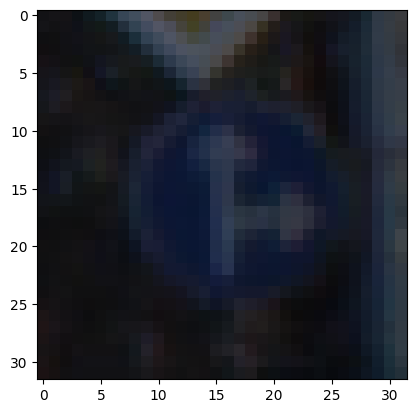

In [7]:
#image visualisation for training dataset
i = 1000
plt.imshow(x_train[i])
y_train[i]

7

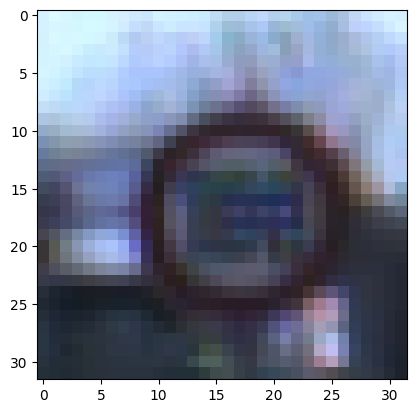

In [8]:
#image visualisation for validation dataset
i = 3000
plt.imshow(x_validation[i])
y_validation[i]

11

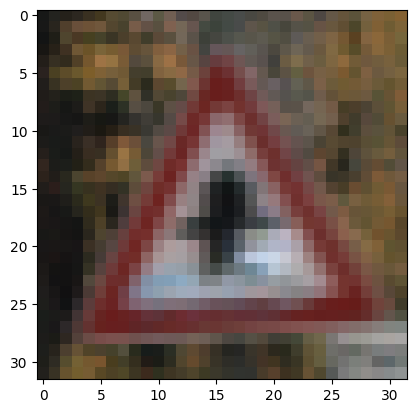

In [9]:
#image visualisation for testing dataset
i = 3000
plt.imshow(x_test[i])
y_test[i]

In [10]:
# dataset preparation 
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

x_train_gray = np.sum(x_train/3, axis = 3, keepdims = True)
x_validation_gray = np.sum(x_validation/3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)

x_test_gray.shape

(12630, 32, 32, 1)

In [11]:
#data normalisation
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128



<Figure size 640x480 with 0 Axes>

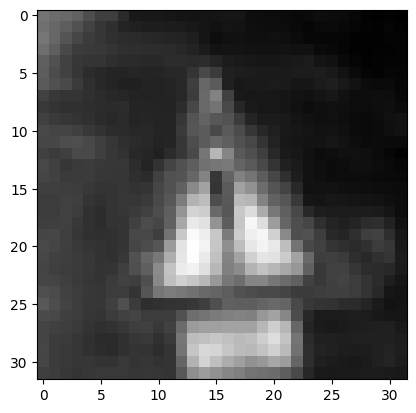

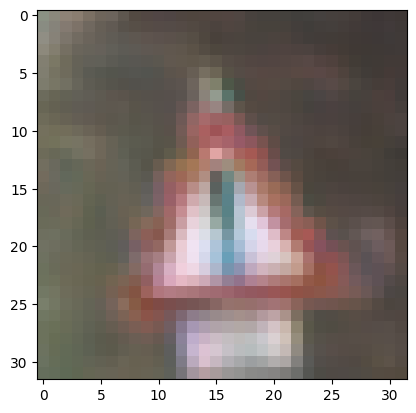

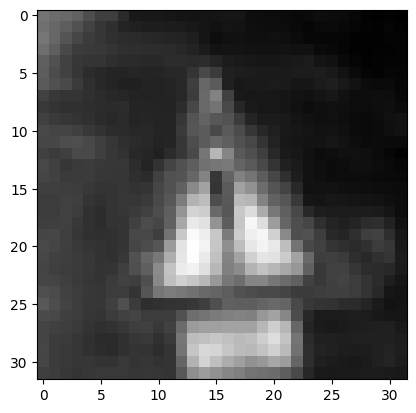

<Figure size 640x480 with 0 Axes>

In [12]:
i = 610
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()

In [13]:
#Model the training 
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu', input_shape =(32,32,1)))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'relu'))

C:\Users\johnb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [15]:
history = cnn_model.fit(x_train_gray_norm, y_train, batch_size = 500, epochs = 50, verbose = 1, validation_data = (x_validation_gray_norm, y_validation))

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.0488 - loss: 6.5462 - val_accuracy: 0.0220 - val_loss: 5.4263
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.0340 - loss: 5.1095 - val_accuracy: 0.0893 - val_loss: 5.2124
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.1545 - loss: 4.7833 - val_accuracy: 0.2138 - val_loss: 5.2689
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.2140 - loss: 4.5141 - val_accuracy: 0.1694 - val_loss: 4.9741
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.2327 - loss: 4.4703 - val_accuracy: 0.1723 - val_loss: 5.2715


In [16]:
# Model evaluation
score = cnn_model.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1866 - loss: 5.1635
Test Accuracy: 0.19041962921619415


In [17]:
history.history.keys()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']

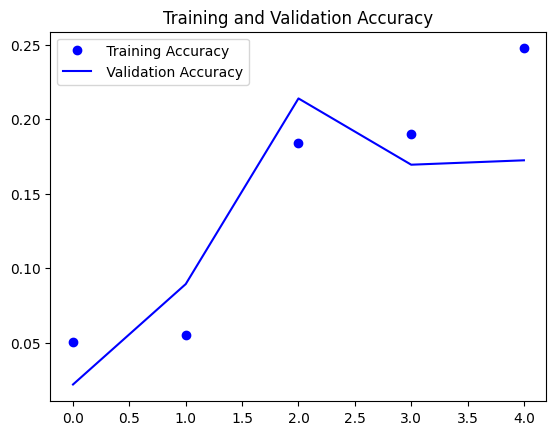

In [18]:
# ploting the varaibles

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label =' Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label =' Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

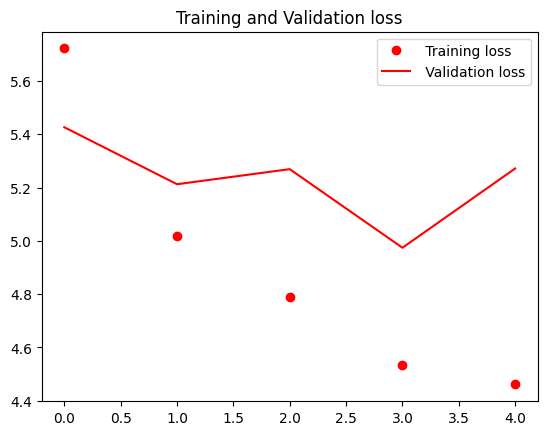

In [23]:
plt.plot(epochs, loss, 'ro', label =' Training loss')
plt.plot(epochs, val_loss, 'r', label =' Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [20]:

predictions = cnn_model.predict(x_test_gray_norm)
predicted_classes = np.argmax(predictions, axis = 1)
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


<Axes: >

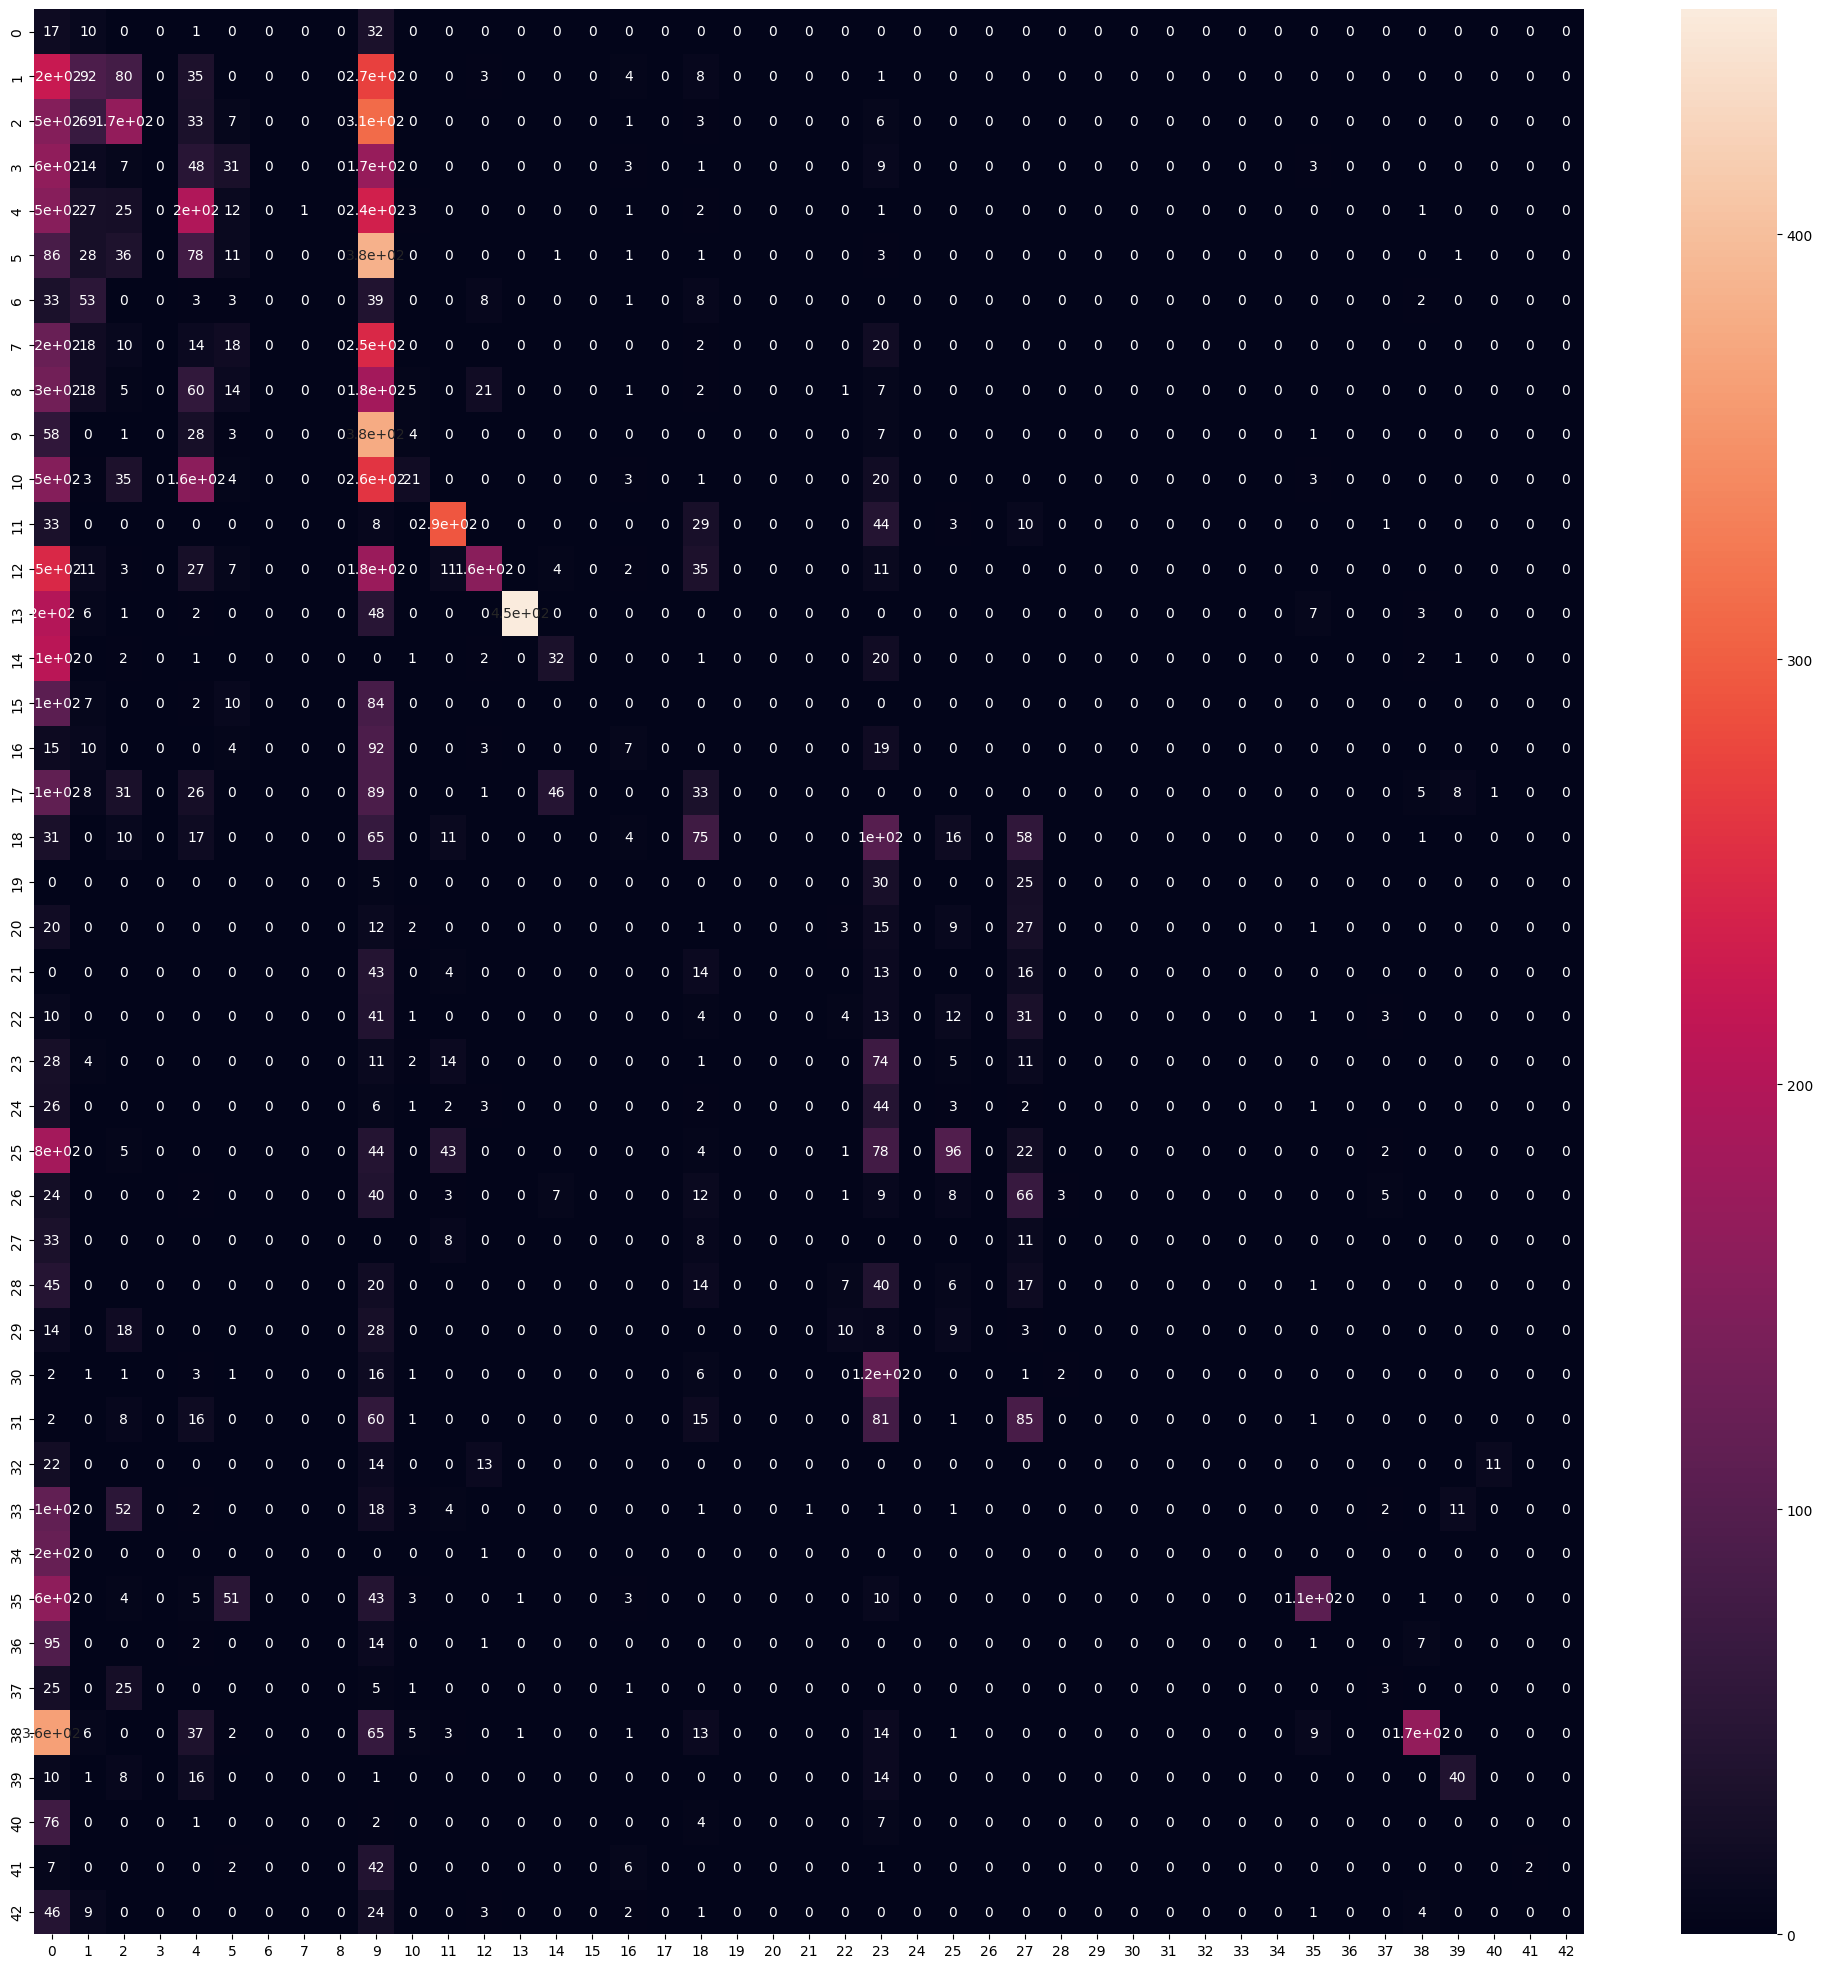

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)


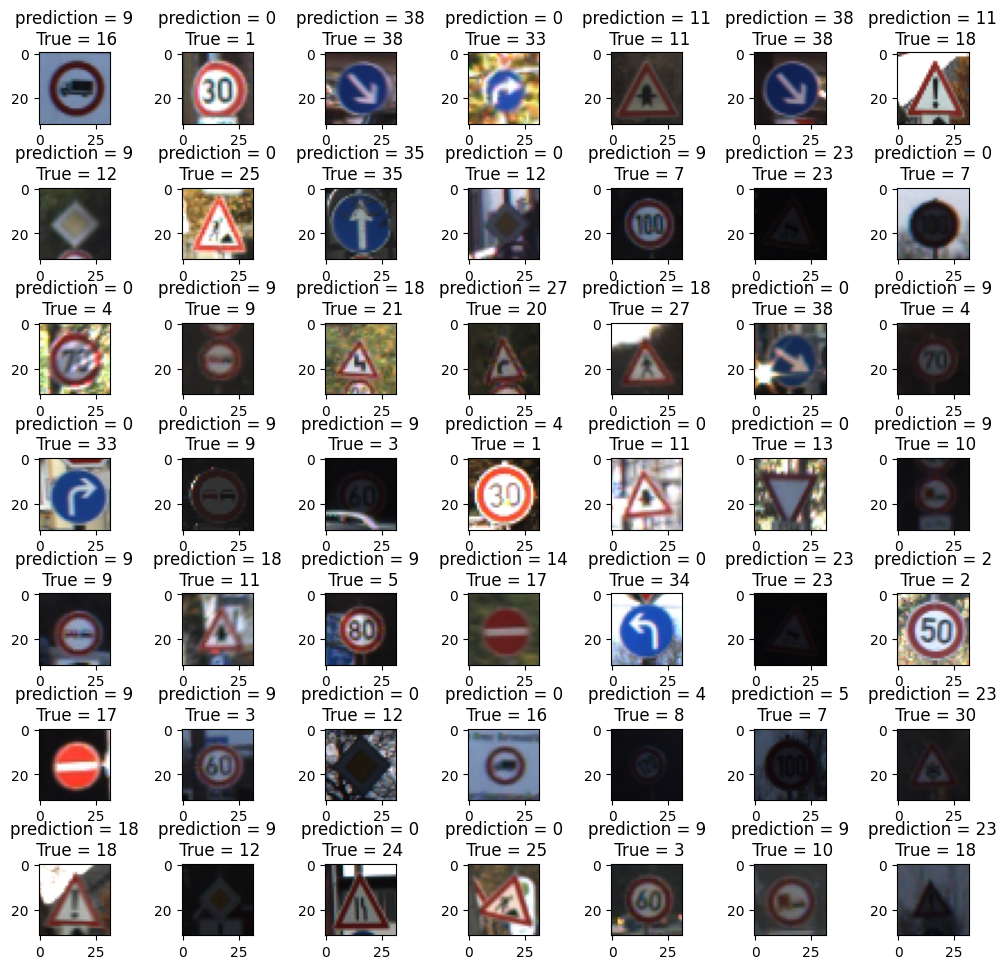

In [27]:
L = 7
W = 7

fig, axis = plt.subplots(L, W, figsize = (12, 12))
axis = axis.ravel()

for i in np.arange(0, L*W):
    axis[i].imshow(x_test[i])
    axis[i].set_title('prediction = {}\n True = {}'. format(predicted_classes[i], y_true[i]))
    
    
plt.subplots_adjust(wspace = 1)